In [1]:
import sys, os
import numpy as np
from pprint import pprint
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

ruta_libs = os.path.abspath("../../libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
from configUnits import *
from networkLibs import *

🧠 ProSimNet inicializado 📅 Día: 2025-09-04 ⏰ Hora: 12:26:08

ProSimNet  terminado con éxito. Tiempo simulado//computacional: 6.0//2.43 s.

ProSimNet  terminado con éxito. Tiempo simulado//computacional: 6.0//0.41 s.


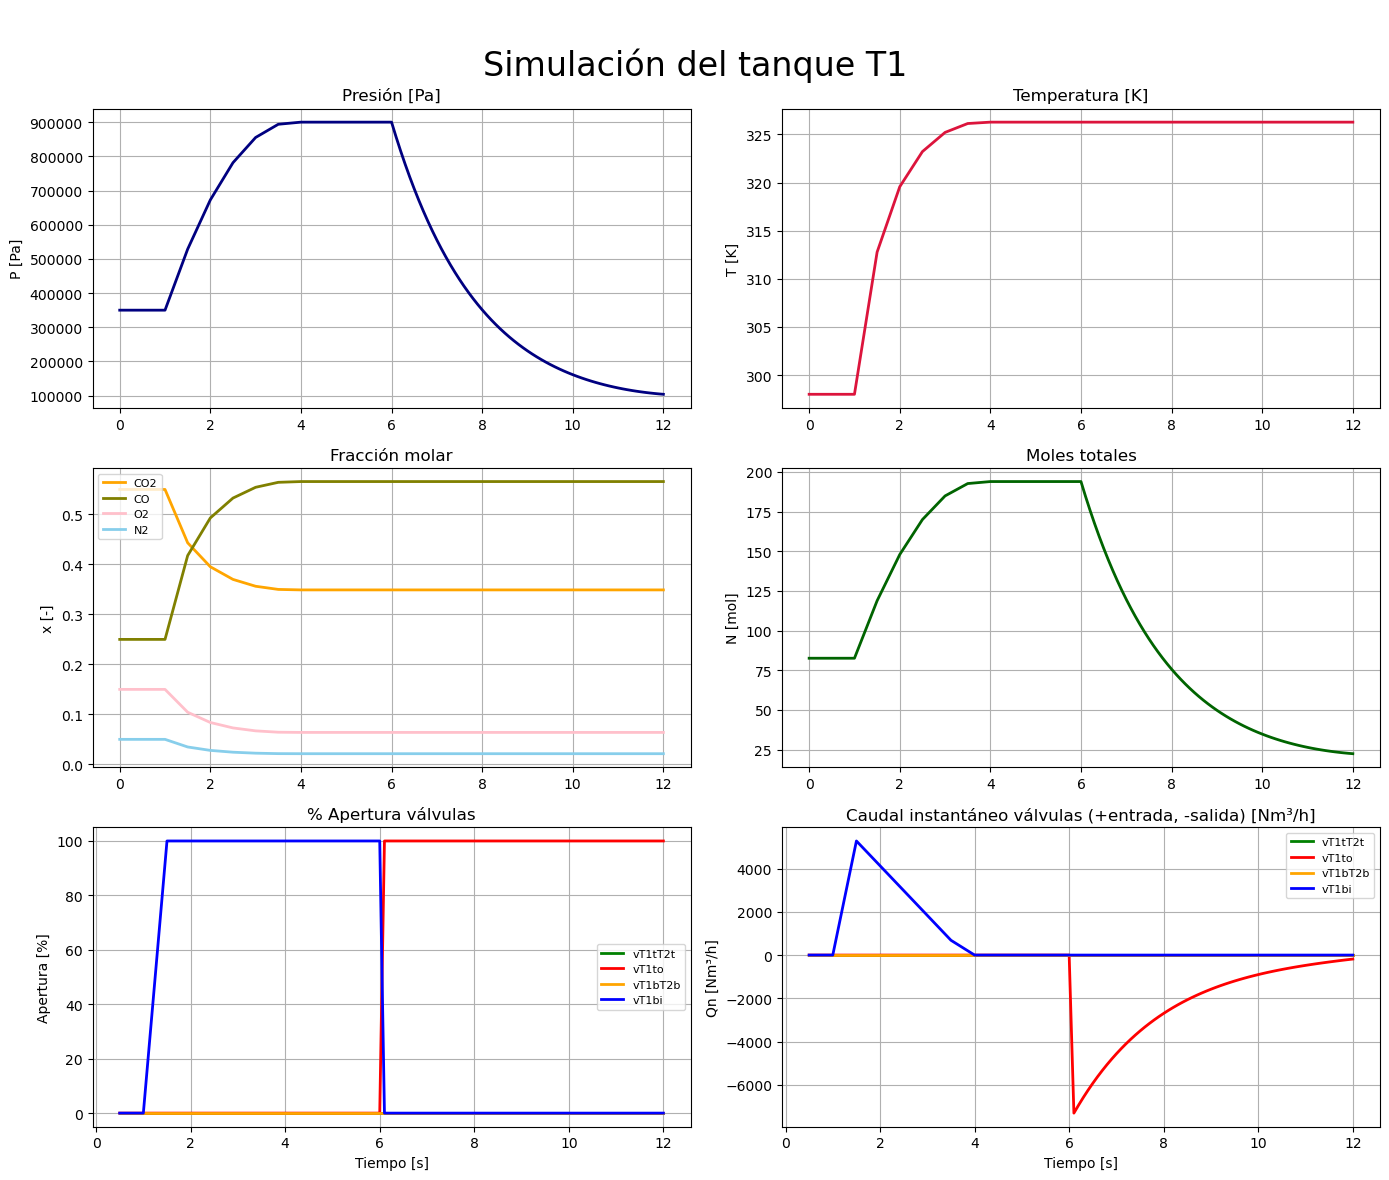

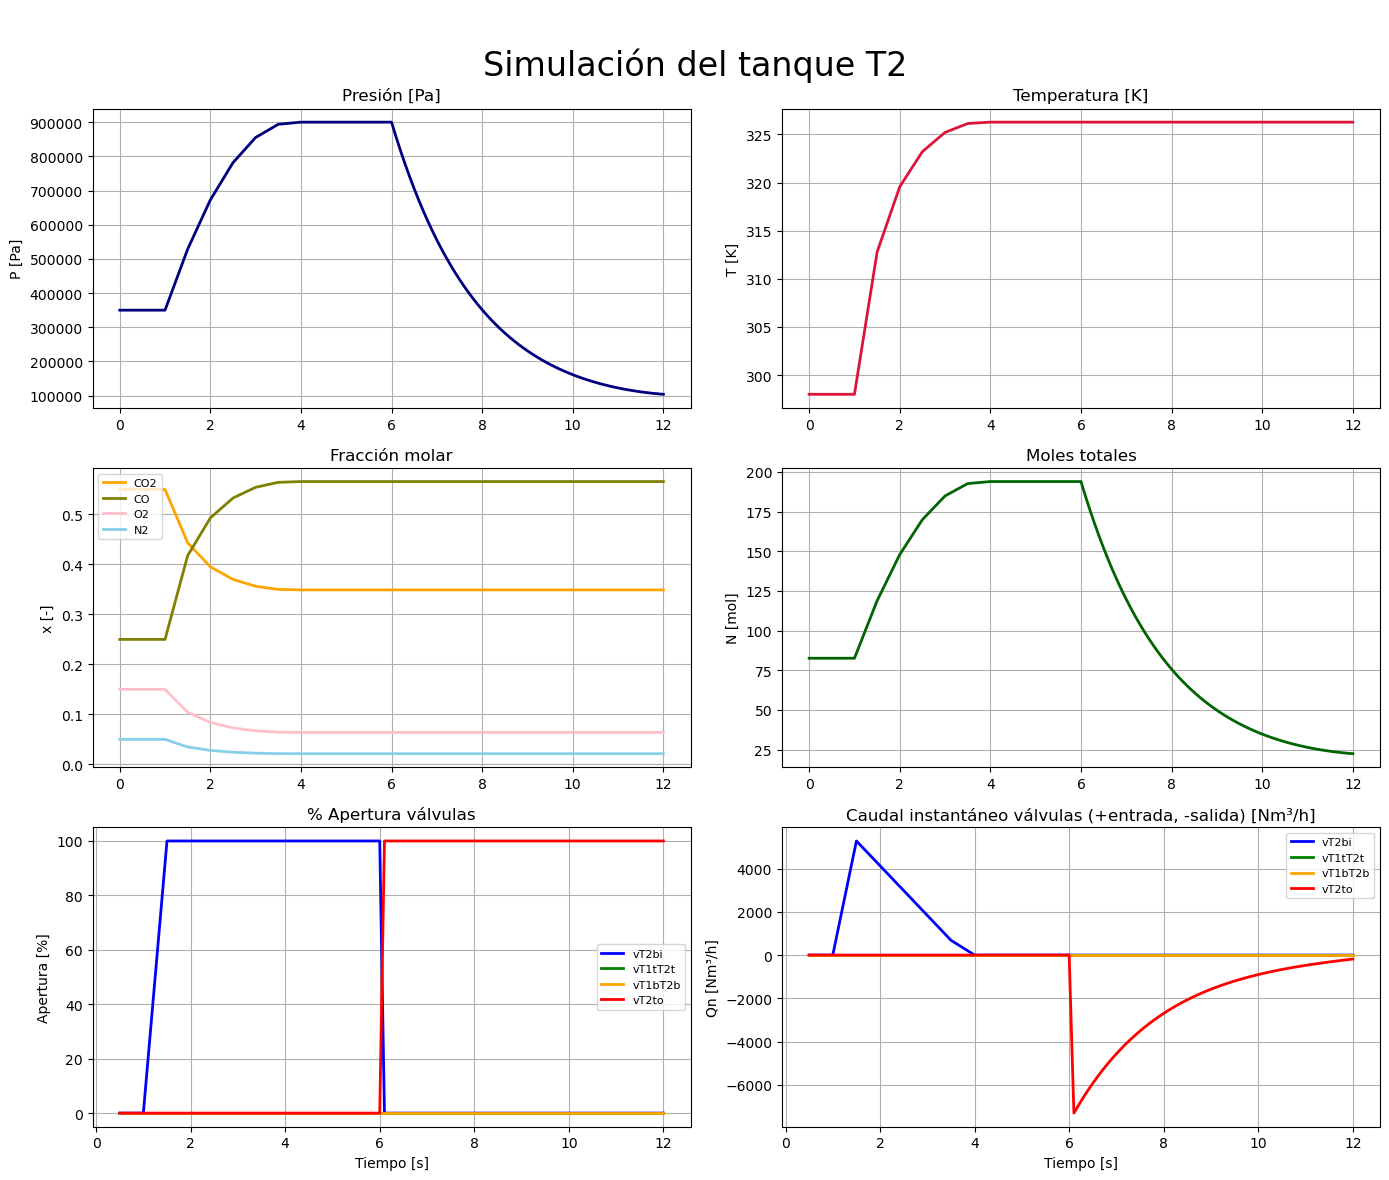

In [2]:
valves=[vT1bi,vT1to,vT2bi,vT2to,vT1tT2t,vT1bT2b]
units=[tank_1,tank_2,]

sim=Network(prop_gas=prop_gas,
            Units=units,
            Valves=valves)

sim._run(saveData=0.5,
    startTime=0,
    endTime=6,
    solver='BDF',
    atol=1e-8,
    rtol=1e-8,
    plot=False,
    logBal=False)


config_vT1bi = {"logic_params": {"start": 6,"duration": 1E-5,},"opening_direction": "oc" }
config_vT1to = {"logic_params": {"start": 6,"duration": 1E-5,},"opening_direction": "co" }

config_vT2bi = {"logic_params": {"start": 6,"duration": 1E-5,},"opening_direction": "oc" }
config_vT2to = {"logic_params": {"start": 6,"duration": 1E-5,},"opening_direction": "co" }

vT1bi.update(config_vT1bi) 
vT1to.update(config_vT1to) 
vT2bi.update(config_vT2bi) 
vT2to.update(config_vT2to) 

sim._run(saveData=0.1,
    startTime='lastTime',
    endTime=12,
    solver='BDF',
    atol=1e-8,
    rtol=1e-8,
    plot=True,
    logBal=False)



ProSimNet  terminado con éxito. Tiempo simulado//computacional: 6.0//2.29 s.


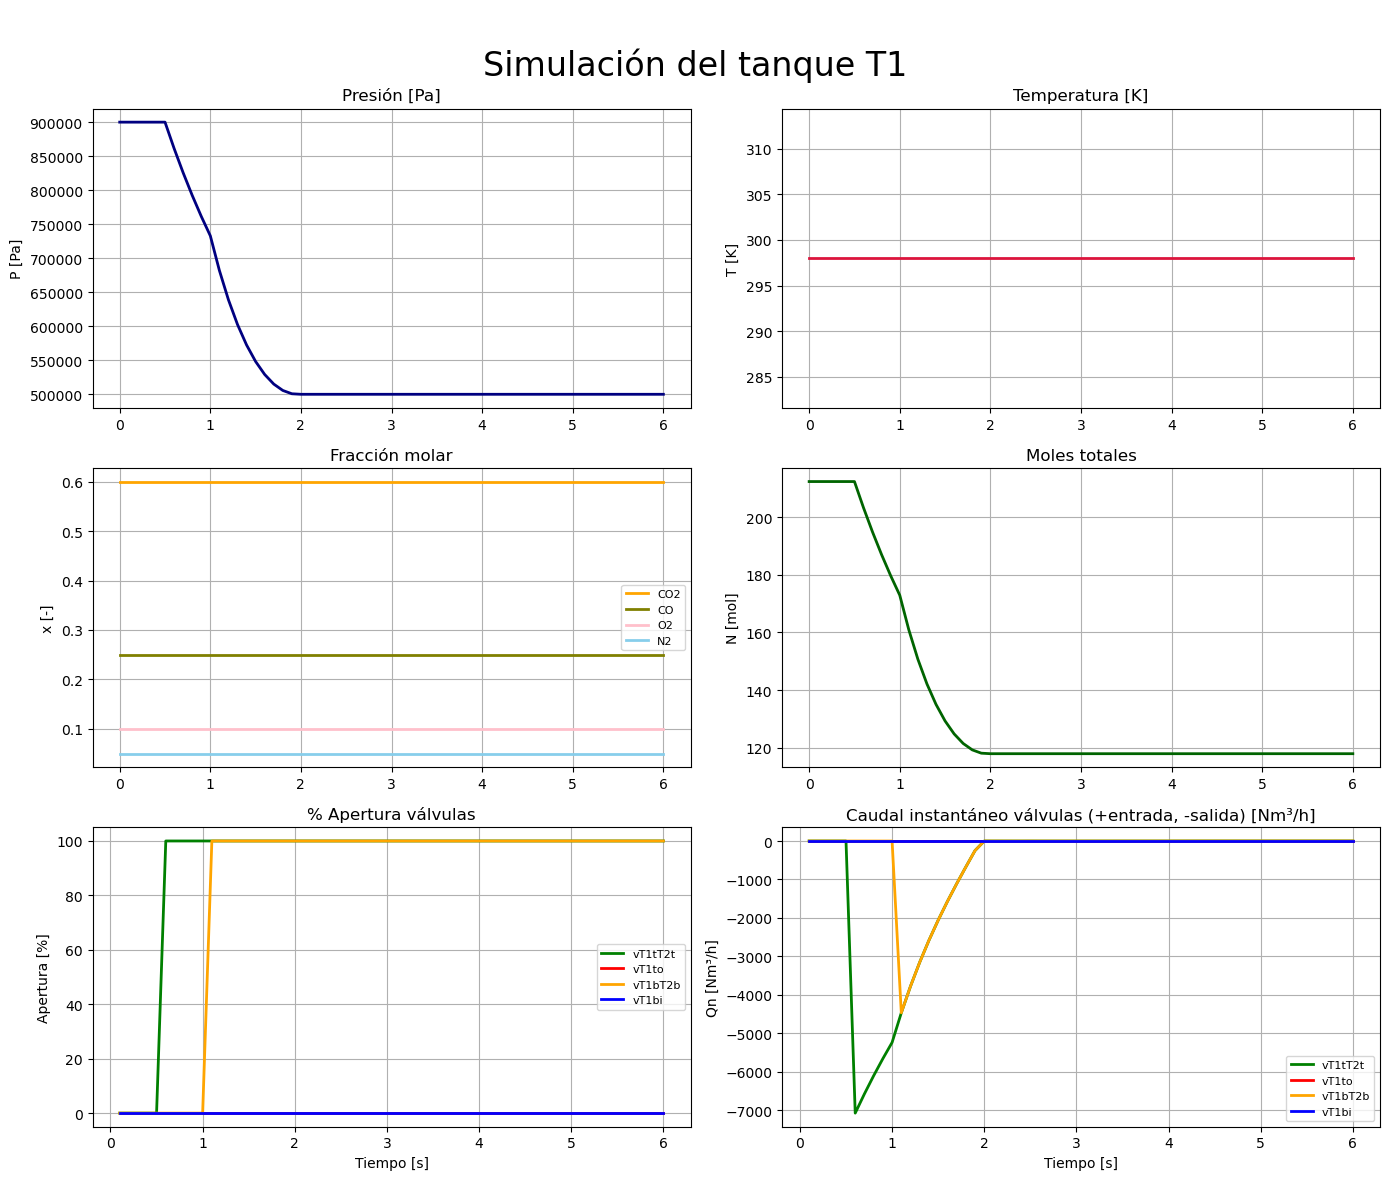

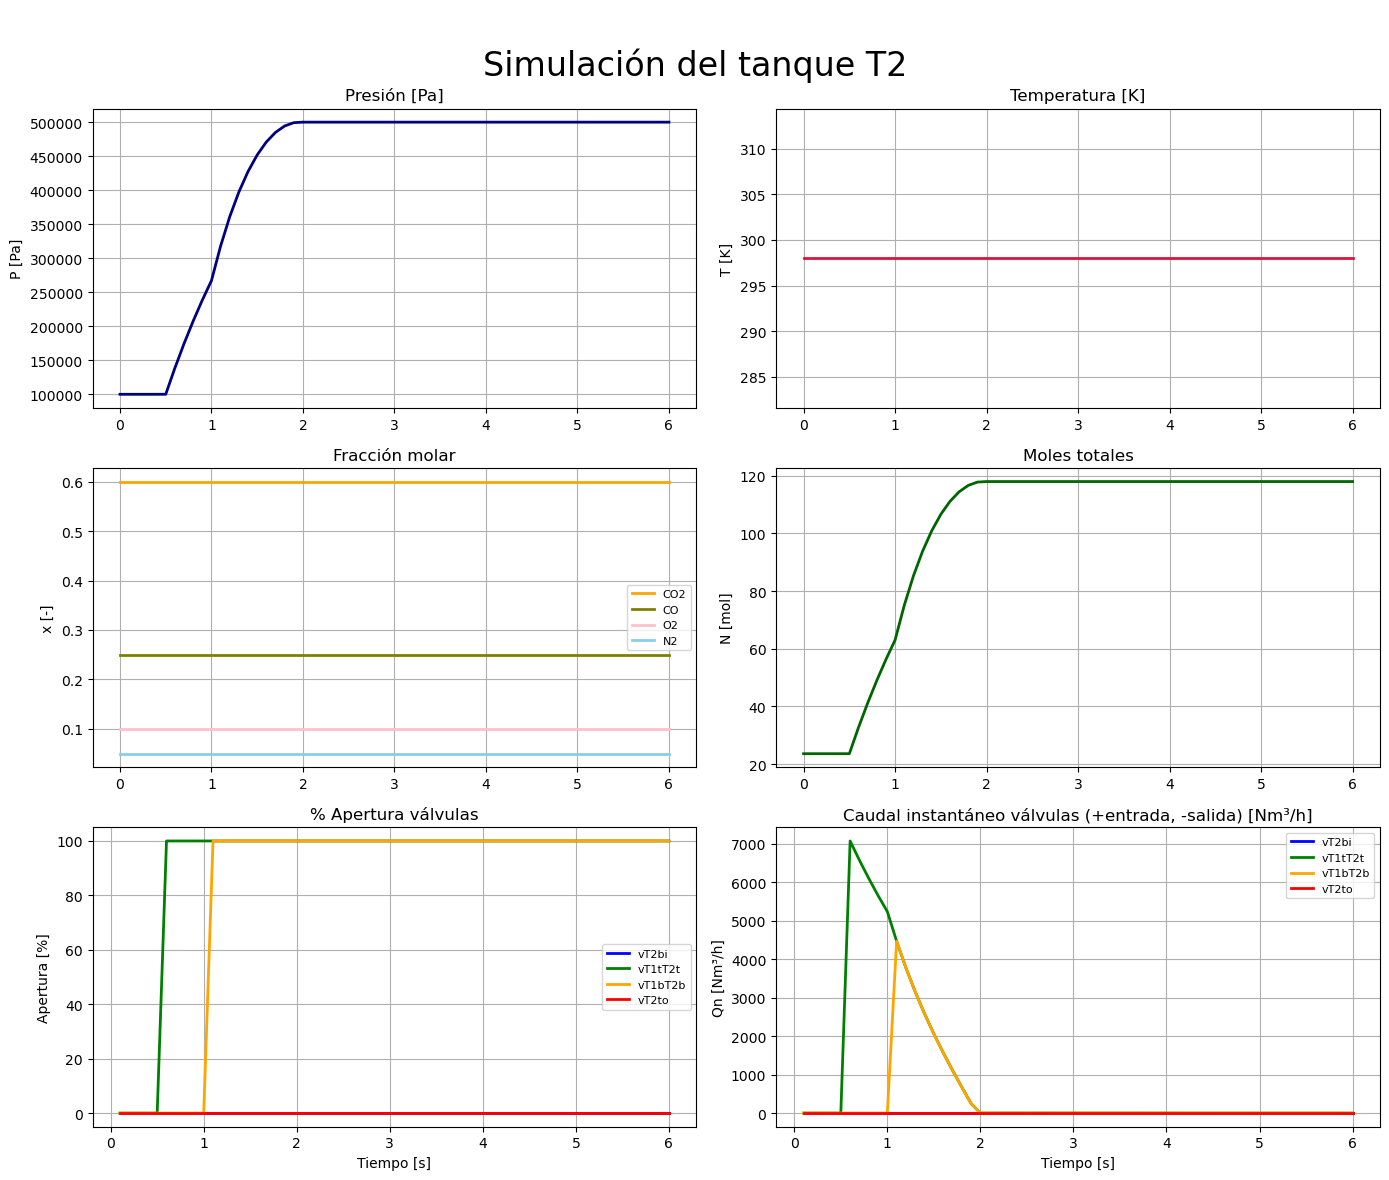

In [3]:
#2VALVULAS INTERUNITS ABIERTAS

tank_1.initialC_info(P0=9.0e5,T0=298.0,x0=[0.6, 0.25, 0.1, 0.05])
tank_2.initialC_info(P0=1.e5,T0=298.0,x0=[0.6, 0.25, 0.1, 0.05])
config_vT1bi = {"logic_params": {"start": 99,"duration": 1E-5,},"opening_direction": "co" }
config_vT1to = {"logic_params": {"start": 99,"duration": 1E-5,},"opening_direction": "co" }
config_vT2bi = {"logic_params": {"start": 99,"duration": 1E-5,},"opening_direction": "co" }
config_vT2to = {"logic_params": {"start": 99,"duration": 1E-5,},"opening_direction": "co" }
config_vT1bT2b  = {"logic_params": {"start":1.,"duration": 1E-5,},"opening_direction": "co" }
config_vT1tT2t = {"logic_params": {"start": 0.5,"duration": 1E-5,},"opening_direction": "co" }

vT1bi.update(config_vT1bi) 
vT1to.update(config_vT1to) 
vT2bi.update(config_vT2bi) 
vT2to.update(config_vT2to) 
vT1bT2b.update(config_vT1bT2b)
vT1tT2t.update(config_vT1tT2t)

sim._run(saveData=0.1,
    startTime=0,
    endTime=6,
    solver='BDF',
    atol=1e-5,
    rtol=1e-5,
    plot=True,
    logBal=False)


ProSimNet  terminado con éxito. Tiempo simulado//computacional: 350.0//5.29 s.


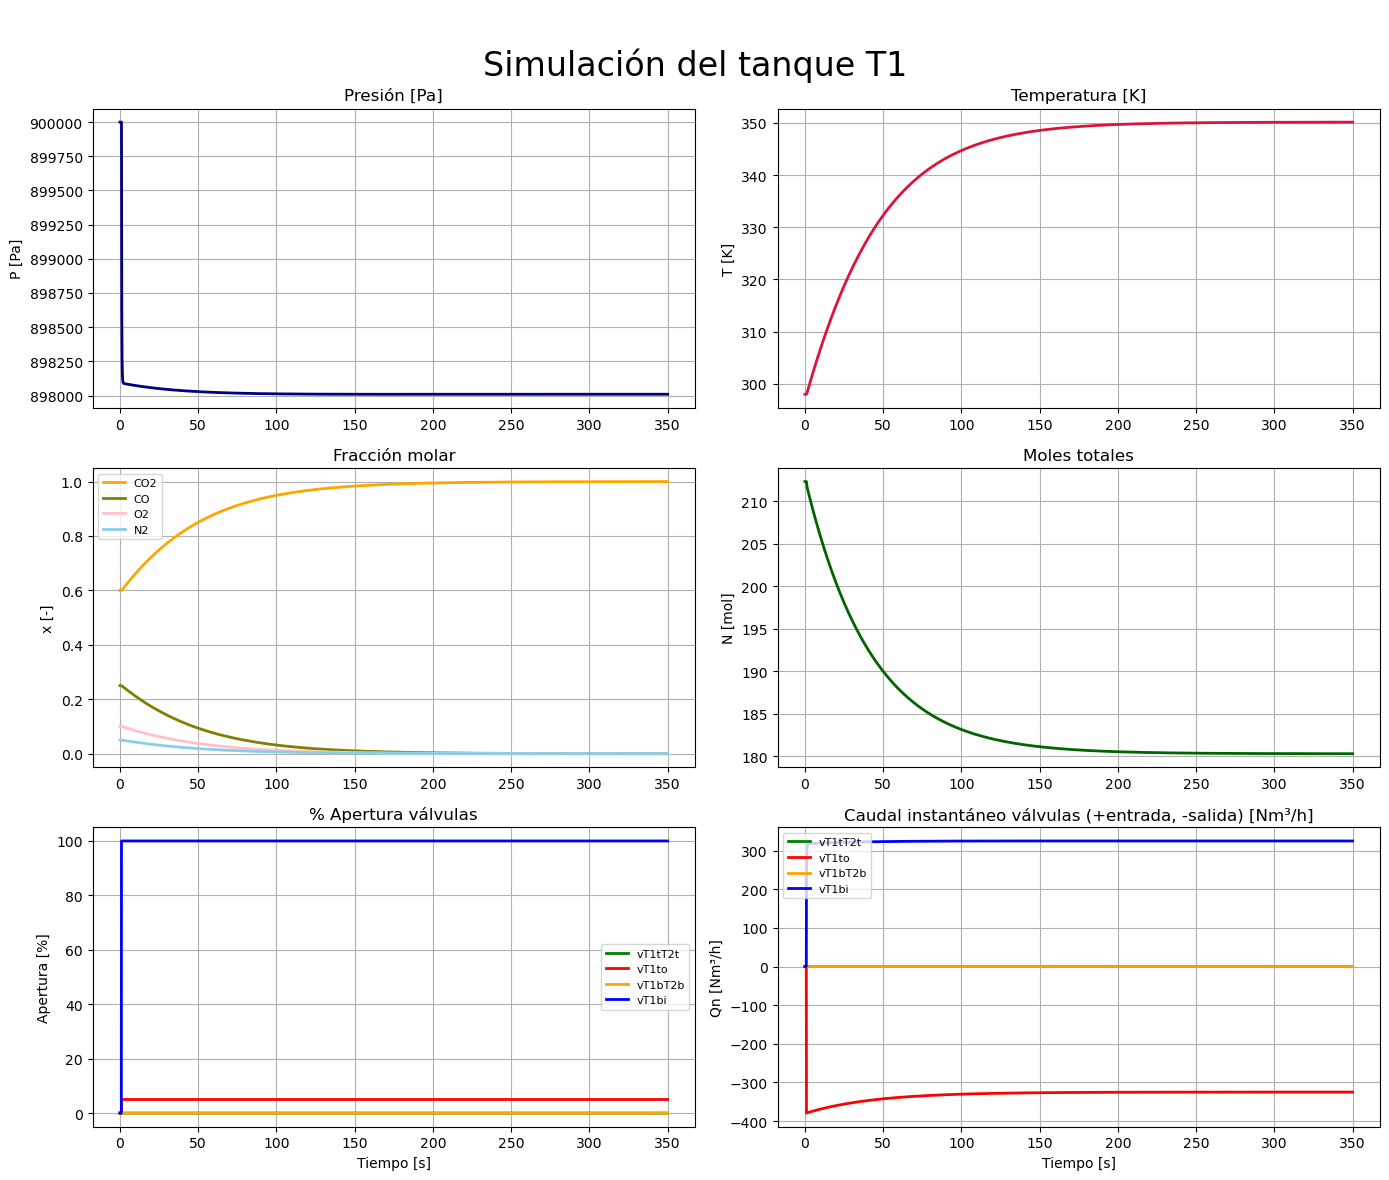

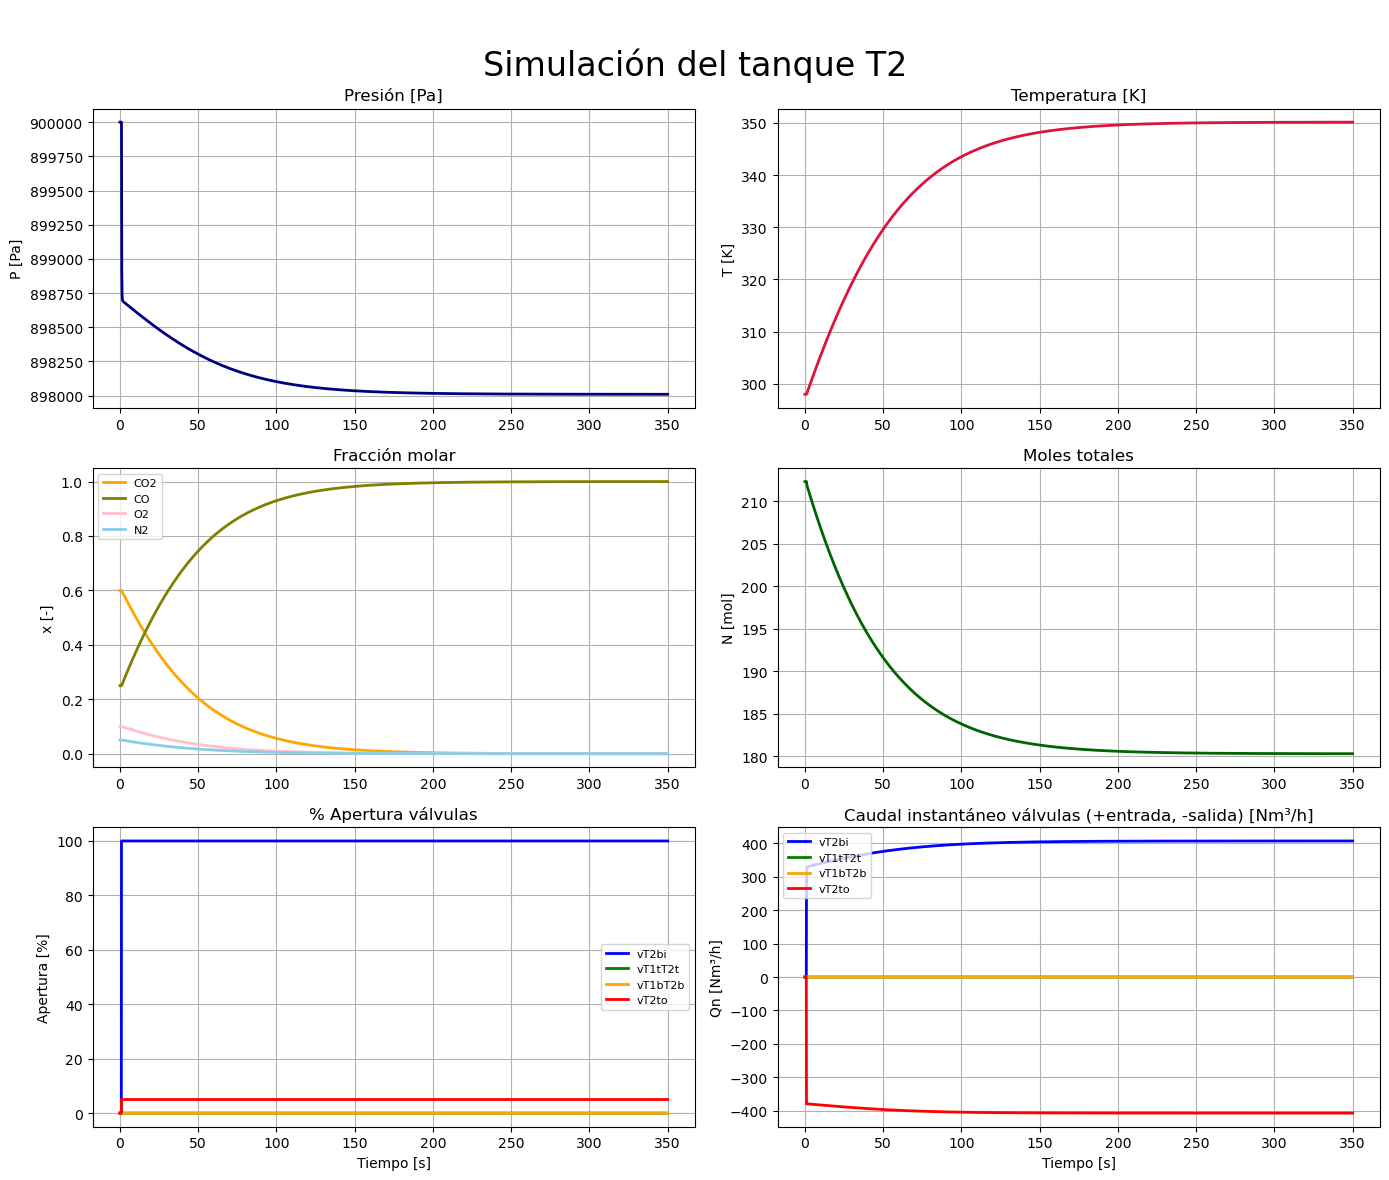

In [4]:
tank_1.initialC_info(P0=9.e5,T0=298.0,x0=[0.6, 0.25, 0.1, 0.05])
tank_2.initialC_info(P0=9.e5,T0=298.0,x0=[0.6, 0.25, 0.1, 0.05])
tank_1.boundaryC_info(Pin=9e5,Tin=350.15,xin=[1., 0.,0., 0.],Pout=1e5)
tank_2.boundaryC_info(Pin=9e5,Tin=350.15,xin=[0., 1.,0., 0.],Pout=1e5)

config_vT1bi = {"logic_params": {"start": 1,"duration": 1E-5,},"opening_direction": "co" }
config_vT1to = {"logic_params": {"start": 1,"duration": 1E-5,},"a_max":0.05,"opening_direction": "co" }
config_vT2bi = {"logic_params": {"start": 1,"duration": 1E-5,},"opening_direction": "co" }
config_vT2to = {"logic_params": {"start": 1,"duration": 1E-5,},"a_max":0.05,"opening_direction": "co" }
config_vT1bT2b  = {"logic_params": {"start":999.,"duration": 1E-5,},"opening_direction": "co" }
config_vT1tT2t = {"logic_params": {"start": 999,"duration": 1E-5,},"opening_direction": "co" }

vT1bi.update(config_vT1bi) 
vT1to.update(config_vT1to) 
vT2bi.update(config_vT2bi) 
vT2to.update(config_vT2to) 
vT1bT2b.update(config_vT1bT2b)
vT1tT2t.update(config_vT1tT2t)

sim._run(saveData=0.1,
    startTime=0,
    endTime=350,
    solver='BDF',
    atol=1e-12,
    rtol=1e-12,
    plot=True,
    logBal=False)